PCA with the `boston` dataset; `GaussianMixture` on $y$ vector.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import pandas as pd

from sklearn import datasets 
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [4]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

from faai import plot_frozen_distrib

## Load data

In [5]:
d = datasets.load_boston()

In [6]:
X = d.data
y = d.target

## PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [8]:
X_pca = pca.transform(X)

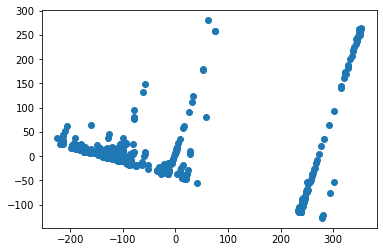

In [9]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

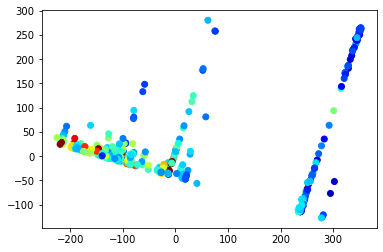

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet')
plt.show()

## GMM on the output vector (1 dimension)

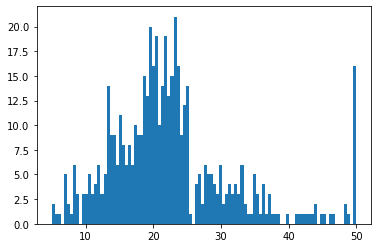

In [11]:
plt.hist(y, bins=100)
plt.show()

In [12]:
y_mat = y.reshape(-1, 1)

gmm = GaussianMixture(n_components=2, covariance_type='diag')
gmm.fit(y_mat)

gmm_predicted_classes = gmm.predict(y_mat)

In [13]:
gmm.covariances_

array([[32.12305535],
       [92.28998322]])

In [14]:
gmm.means_

array([[19.51431374],
       [36.26661459]])

In [15]:
dist_1 = sp.stats.norm(loc=gmm.means_[0][0], scale=np.sqrt(gmm.covariances_[0][0]))
dist_2 = sp.stats.norm(loc=gmm.means_[1][0], scale=np.sqrt(gmm.covariances_[1][0]))

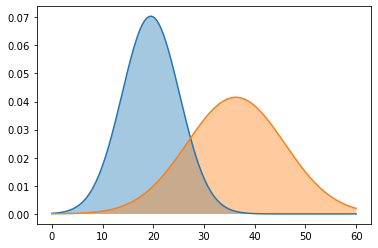

In [16]:
plot_frozen_distrib(0, 60, dist_1)
plot_frozen_distrib(0, 60, dist_2)

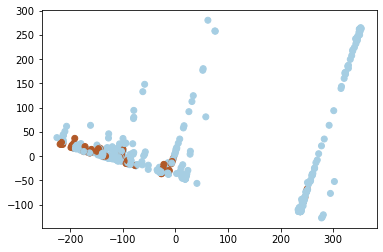

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_predicted_classes, cmap='Paired')
plt.show()